# **Assignment 10**

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
rs = 999

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import matplotlib.pyplot as plt

In [2]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
# clean feature names
feature_names = [fn.replace(" ", "_")[:-5] for fn in iris.feature_names]
df = pd.DataFrame(iris['data'], columns = feature_names)
df['target'] = iris.target

# function to map numerical target to actual flowernames
def map_target_names(target):
    if target == 0:
        return iris.target_names[0]
    elif target == 1:
        return iris.target_names[1]
    else:
        return iris.target_names[2]

# get all data into single dataframe
df['target_name'] = df.apply(lambda row: map_target_names(row['target']),axis=1)

# separate into X and y
X = df.drop(columns = ['target', 'target_name'], axis=1).values
y = df['target'].values

# print first 5 rows of dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [4]:
# define number of neighbors
neighbors = 5

# build and fit model
knn = KNN(n_neighbors = neighbors)
knn.fit(X, y)

# create new observations
new_observations = [[5.1, 3.5, 1.4, 0.2], [6.9, 3.1, 5.1, 2.3], [6.0, 2.2, 4.0, 1.0],
                    [8.1, 6.2, 2.9, 1.3], [5.5, 10.9, 4.8, 1.7], [6.3, 2.9, 3.1, 1.0]]

# make and count predictions of the target using the new predictions
preds = [map_target_names(pred) for pred in knn.predict(new_observations)]
Counter(preds)

Counter({'setosa': 2, 'virginica': 1, 'versicolor': 3})

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [5]:
def train_score_knn(n, split, X, y):
    
    # build KNN model
    knn = KNN(n_neighbors = n)
    # split data
    X_train, X_test, y_train, y_test = tts(X, y, test_size=split, shuffle=True, random_state=rs)
    # fit model and get accuracy score
    knn.fit(X_train, y_train)
    return knn.score(X_test, y_test)

train_score_knn(5, 0.25, X, y)

0.9736842105263158

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [6]:
# get list of all possible n_neighbors values
neighbors = np.arange(1, 31)

# intialize empty list for scores
train_scores = []
test_scores = []

# split data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, shuffle=True, random_state=rs)

# loop through neigbors, fit model for each neighbor value and get score on tesing and training set
for n in neighbors:
    knn = KNN(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

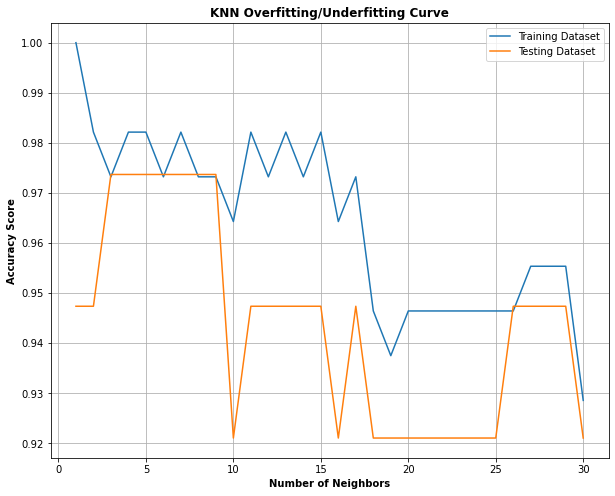

In [7]:
# plot the testing and training scores from the above cell 

plt.figure(figsize=(10, 8))
plt.plot(neighbors, train_scores, label = 'Training Dataset')
plt.plot(neighbors, test_scores, label = 'Testing Dataset')
plt.xlabel('Number of Neighbors', fontweight = 'bold')
plt.ylabel('Accuracy Score', fontweight = 'bold')
plt.title('KNN Overfitting/Underfitting Curve', fontweight='bold')
plt.legend()
plt.grid()
plt.show()

Looks the the model performs best with anywhere between 3 and 9 neighbors. 